In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
#import csv (includes MovieData.csv and API data)
combined_df = pd.read_csv("Resources/api_merge_df.csv")
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
combined_df.dtypes

movie_name                   object
Country                      object
Release Date                 object
IMDB Rating                 float64
Metascore                   float64
TomatoMeter                  object
production_budget             int64
domestic_box_office           int64
international_box_office      int64
rating                       object
genre                        object
Total Box Office              int64
ROI                          object
dtype: object

In [4]:
combined_df.count()

movie_name                  1800
Country                     1800
Release Date                1800
IMDB Rating                 1800
Metascore                   1729
TomatoMeter                 1800
production_budget           1800
domestic_box_office         1800
international_box_office    1800
rating                      1800
genre                       1800
Total Box Office            1800
ROI                         1800
dtype: int64

In [5]:
#converting metascore to 0.0/10 
combined_df["Metascore"] = (combined_df["Metascore"]*.1).round(1)
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,4.5,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,6.8,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,4.5,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,7.5,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,4.8,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,4.9,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,6.1,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,8.4,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,6.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [6]:
#imdb ratings to list 
imdb_rating = combined_df["IMDB Rating"].to_list()
imdb_rating

[5.2,
 6.4,
 6.8,
 6.7,
 6.2,
 5.5,
 6.2,
 7.3,
 5.4,
 6.1,
 6.8,
 6.3,
 6.9,
 6.9,
 6.5,
 7.0,
 7.0,
 7.9,
 7.5,
 6.7,
 7.0,
 5.1,
 7.3,
 6.3,
 4.7,
 7.3,
 6.1,
 5.5,
 5.1,
 6.5,
 8.2,
 5.8,
 7.6,
 7.6,
 5.0,
 5.0,
 6.4,
 5.4,
 3.3,
 6.1,
 7.4,
 6.3,
 7.5,
 6.7,
 7.0,
 7.5,
 2.8,
 7.3,
 5.1,
 6.1,
 5.9,
 2.8,
 5.3,
 6.4,
 6.2,
 7.1,
 7.4,
 5.1,
 4.8,
 7.1,
 5.3,
 2.9,
 7.5,
 6.3,
 6.5,
 5.8,
 7.7,
 7.4,
 5.4,
 6.9,
 6.9,
 7.5,
 4.4,
 5.1,
 6.0,
 6.0,
 7.1,
 7.1,
 6.6,
 7.2,
 5.8,
 6.0,
 5.4,
 6.7,
 7.2,
 5.7,
 6.8,
 5.5,
 6.9,
 4.4,
 7.0,
 6.4,
 4.7,
 5.1,
 7.3,
 6.8,
 5.1,
 7.8,
 7.1,
 8.5,
 6.5,
 6.7,
 5.8,
 7.0,
 6.5,
 6.6,
 4.5,
 5.6,
 6.5,
 8.2,
 7.6,
 5.8,
 5.0,
 5.6,
 5.8,
 7.0,
 5.6,
 5.5,
 8.0,
 6.2,
 4.4,
 5.6,
 6.5,
 6.1,
 7.5,
 4.4,
 7.1,
 5.9,
 6.9,
 4.4,
 6.6,
 6.8,
 6.6,
 5.5,
 6.5,
 7.9,
 5.7,
 5.3,
 6.4,
 6.3,
 6.4,
 6.9,
 6.0,
 6.1,
 8.5,
 8.0,
 5.1,
 8.0,
 6.4,
 6.6,
 6.0,
 6.6,
 6.9,
 6.1,
 5.7,
 6.7,
 7.3,
 6.0,
 5.9,
 7.3,
 5.3,
 6.5,
 5.7,
 5.9,
 6.6,
 3.9,
 7.9

In [7]:
#metascore ratings to list
metascore = combined_df["Metascore"].to_list()

In [8]:
#metascore to list
#metascore = (combined_df["Metascore"]*.1).round(1).to_list()

In [9]:
t_list = combined_df["TomatoMeter"].replace('%','',regex=True).to_list()
t_list

['26',
 '88',
 '41',
 '81',
 '28',
 '20',
 '47',
 '25',
 '18',
 '58',
 '28',
 '52',
 '61',
 '94',
 '21',
 '62',
 '74',
 '91',
 '80',
 '75',
 '47',
 '14',
 '50',
 '47',
 '20',
 '96',
 '53',
 '26',
 '9',
 '86',
 '95',
 '13',
 '74',
 '74',
 '71',
 '71',
 '52',
 '38',
 '5',
 '62',
 '41',
 '40',
 '90',
 '49',
 '83',
 '74',
 '8',
 '85',
 '10',
 '19',
 '26',
 '7',
 '4',
 '31',
 '21',
 '68',
 '69',
 '11',
 '11',
 '77',
 '29',
 '4',
 '86',
 '43',
 '73',
 '43',
 '53/100',
 '87',
 '14',
 '67',
 '42',
 '73',
 '8',
 '40',
 '51',
 '51',
 '93',
 '93',
 '44',
 '100',
 '40',
 '34',
 '69',
 '42',
 '52',
 '53',
 '37',
 '13',
 '75',
 '4',
 '25',
 '57',
 '5',
 '35',
 '72',
 '35',
 '35',
 '66',
 '72',
 '76',
 '63',
 '17',
 '62',
 '65',
 '56',
 '56',
 '4',
 '24',
 '31',
 '73',
 '86',
 '18',
 '6',
 '22',
 '34',
 '73',
 '20',
 '23',
 '67',
 '37/100',
 '26',
 '32',
 '33',
 '35',
 '59',
 '12',
 '48',
 '67',
 '37',
 '6',
 '71',
 '56',
 '75',
 '25',
 '78',
 '92',
 '21',
 '50',
 '34',
 '78',
 '76',
 '50',
 '36',
 '

In [10]:
#combined_df["TomatoMeter"] = combined_df["TomatoMeter"].replace('%','',regex=True).astype('float')/100
#combined_df

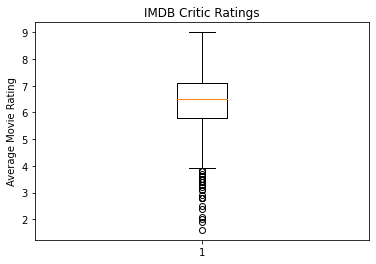

In [11]:
#creating boxplot for critic ratings
fig1, ax1 = plt.subplots()
ax1.set_title('IMDB Critic Ratings')
ax1.set_ylabel('Average Movie Rating')
ax1.boxplot(imdb_rating)
plt.show()

In [ ]:
#creating boxplot for critic ratings
fig2, ax2 = plt.subplots()
ax2.set_title('MetaScore Critic Ratings')
ax2.set_ylabel('Average Movie Rating')
ax2.boxplot(metascore)
plt.show()

In [ ]:
#creating boxplot for tomatoMeter ratings
fig3, ax3 = plt.subplots()
ax3.set_title('TomatoMeter Critic Ratings')
ax3.set_ylabel('Average Movie Rating')
ax3.boxplot(tmeter)
plt.show()

In [ ]:
#combine boxplots to compare critic ratings 
